In [2]:
library(xlsx)
library(ggplot2, quietly=TRUE)
library(dplyr, quietly=TRUE)
library(xts, quietly=TRUE)
library(fpp2, quietly=TRUE)
library(GGally, quietly=TRUE)

# 1. Introduction (Selecting and Loading the Datasets)

In recent years, Turkey suffers from different problems, which causes flactuations in the parameters. Thus, it is hard to find direct relations between the parameters in different categories. However, main causes in trends and flactuations can be listed by searching fundamentals of the processes. In this homework, 3 different relevant datasets were determined by market searches, logical approaches, and other informations related to datasets. 

First of all, which parameters are selected must be given to explain the reasons for selection. A exchange rate "(USD) US Dollar (Selling)", a producer price index "Domestic PPI general", and a housing index "Residential Property Price Index (RPPI)" are selected for analysis. By knowing the importance of the dollar index for all operations, dollar index is the first index is set. Producer price index "Domestic PPI general" is one of the good options by knowing how much producer dependent to materials form abroad and entegrated all the world in the free market, which also can be understood by looking <a href="https://dergipark.org.tr/tr/download/article-file/1181000"> the article</a> and a <a href="https://forextraininggroup.com/impact-cpi-economic-indicator-currency-price-movements/"> new</a>
. The last index is property price index "Residential Property Price Index (RPPI)". Price of a lot of raw materials for houses purchased by foreign currencies. This fact is observed at <a href="https://www.mashvisor.com/blog/exchange-rates-affect-real-estate/"> the new</a> . Also, house price is also one of the component for the Price indexes, which causes to a relavancy between the indexes. This information can be obtained by <a href="https://www.um.edu.mo/fba/irer/papers/current/vol18n2_pdf/03.pdf"> the article</a>. 

Namely, all the datasets are relevant topics to each other. Main aim of homework is to observe and aprrove relevancy of the indexes by visualization and finding correlations. In other words, research question for this homework can be listed as:
* Is there any natural relation ship between the Dollar Currency Rate and Producer Price Index, Residential Property Price Index?
* Is Residential Property Price Index vulnerable to Dollar Currency Rate and Producer Price Index?
* A lot of things in production is dependent to raw material. Does it cause a strong relation between the Dollar Currency Rate and Producer Price Index?
* Residential Property Price Index is one of the result for cost of production. So, is there any relavence between the Residential Property Price Index and Producer Price Index?
* Are all the founded resources mentioned in the introduction valid for Turkey?

In [3]:
price_index=read.xlsx("Price Index.xlsx",sheetIndex=1, header=TRUE)
#plot(price_index)
price_index$Tarih=as.Date(as.yearmon(price_index$Tarih))
str(price_index)

'data.frame':	44 obs. of  2 variables:
 $ Tarih        : Date, format: "2017-01-01" "2017-02-01" ...
 $ TP.TUFE1YI.T1: num  285 289 292 294 295 ...


In [4]:
property_price_index=read.xlsx("Residential Property Price Index.xlsx",sheetIndex=1, header=TRUE)
#plot(property_price_index)
property_price_index$Tarih=as.Date(as.yearmon(property_price_index$Tarih))
str(property_price_index)

'data.frame':	44 obs. of  2 variables:
 $ Tarih    : Date, format: "2017-01-01" "2017-02-01" ...
 $ TP.HKFE01: num  95.5 96.7 97.9 98.7 99.8 ...


In [5]:
dollar_exchange_rate=read.xlsx("Dolar Exchange Rate.xlsx",sheetIndex = 1, header=TRUE)
#plot(dollar_exchange_rate)
dollar_exchange_rate$Tarih=as.Date(as.yearmon(dollar_exchange_rate$Tarih))
str(dollar_exchange_rate)

'data.frame':	44 obs. of  2 variables:
 $ Tarih          : Date, format: "2017-01-01" "2017-02-01" ...
 $ TP.DK.USD.S.YTL: num  3.74 3.68 3.67 3.66 3.57 ...


# 2. Merging the datasets (by date column)

In [6]:
sub_df<-merge(price_index,property_price_index,by="Tarih")
df<-merge(sub_df,dollar_exchange_rate,by="Tarih")

# 3. Creating a Time-Series Object

In [7]:
df_ts <- xts(df[,-1], order.by=as.Date(df[,1], "%Y/%m/%d"))
glimpse(df_ts)

An 'xts' object on 2017-01-01/2020-08-01 containing:
  Data: num [1:44, 1:3] 285 289 292 294 295 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:3] "TP.TUFE1YI.T1" "TP.HKFE01" "TP.DK.USD.S.YTL"
  Indexed by objects of class: [Date] TZ: UTC
  xts Attributes:  
 NULL


In [8]:
colnames(df_ts)[1]<-"producer_price_index"
colnames(df_ts)[2]<-"prop_price_index"
colnames(df_ts)[3]<-"dollar_rate"

# 4. Visualization

## a. Line Plot for each Index

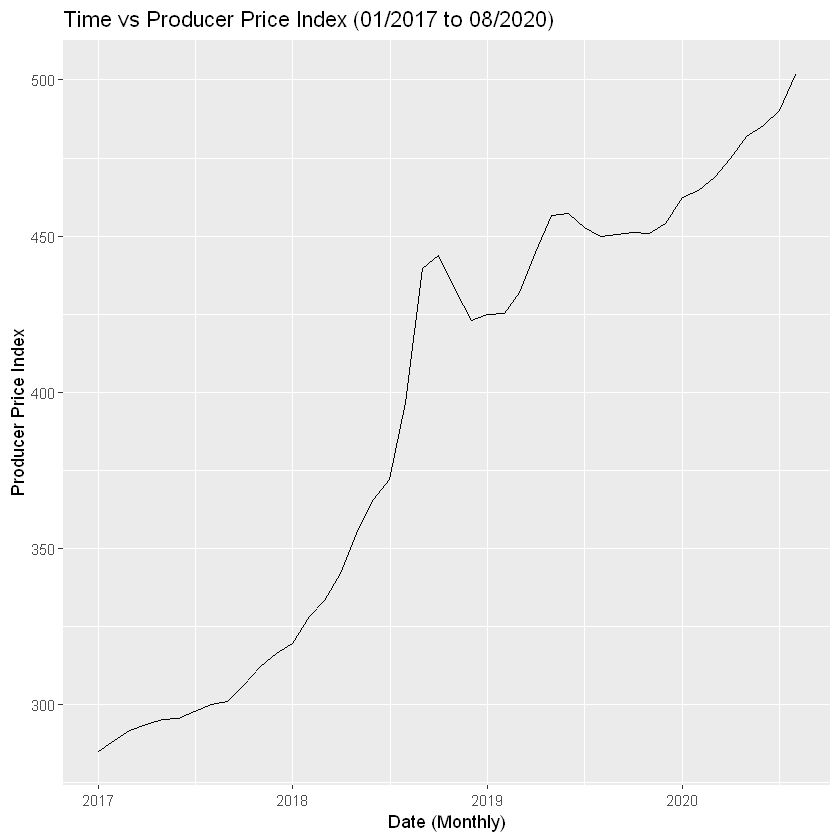

In [9]:
autoplot(df_ts[,c("producer_price_index")])+ggtitle("Time vs Producer Price Index (01/2017 to 08/2020)")+
  ylab("Producer Price Index")+xlab("Date (Monthly)")

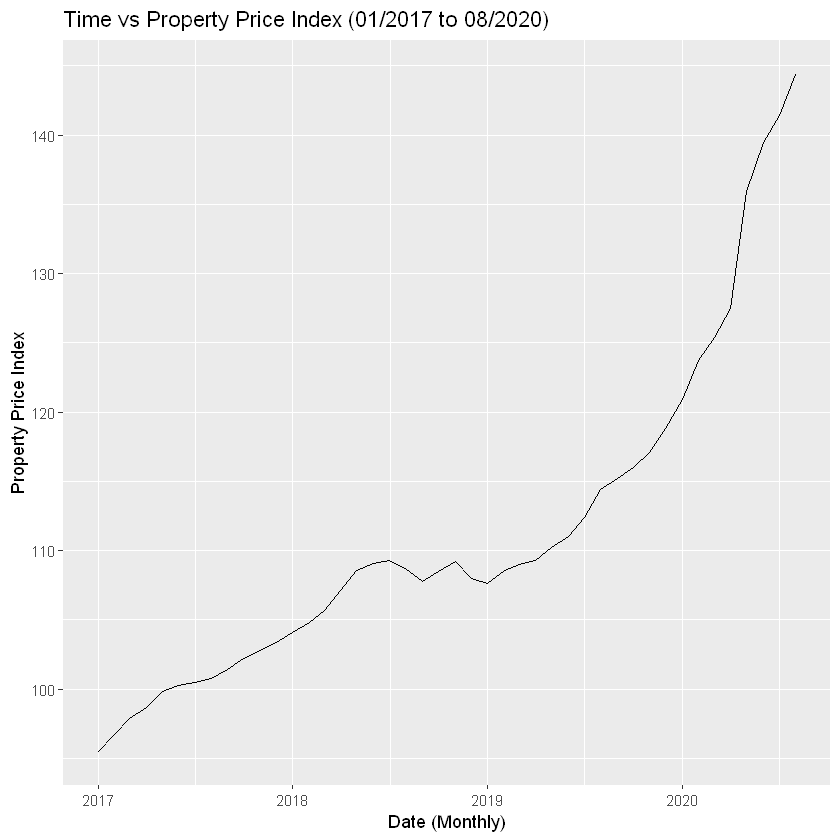

In [10]:
autoplot(df_ts[,c("prop_price_index")])+ggtitle("Time vs Property Price Index (01/2017 to 08/2020)")+
  ylab("Property Price Index")+xlab("Date (Monthly)")

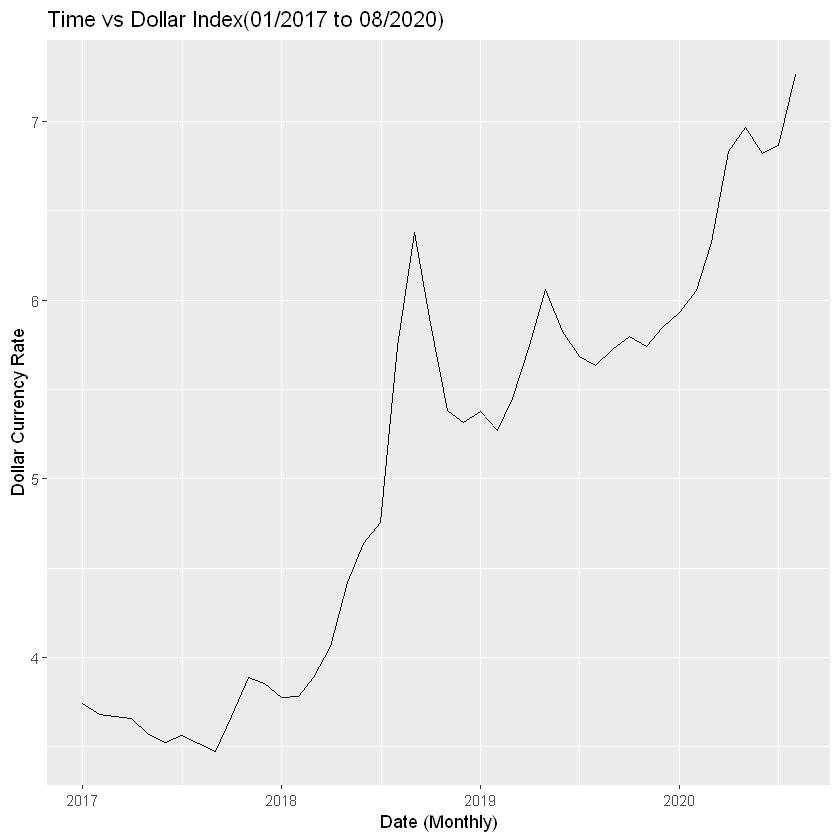

In [11]:
autoplot(df_ts[,c("dollar_rate")])+ggtitle("Time vs Dollar Index(01/2017 to 08/2020)")+
  ylab("Dollar Currency Rate")+xlab("Date (Monthly)")#+geom_smooth()

For all line plots, there are increase trends, which can be one of the clue for saying there are a relevance between the indexes. But it is hard to observe increase and decreases parts of plots comparatively. In general, line plot enables to say that all the indexes experience flactuations, and all of them have an increase trend. 

## b.General looking 3 different indexes at the same plot

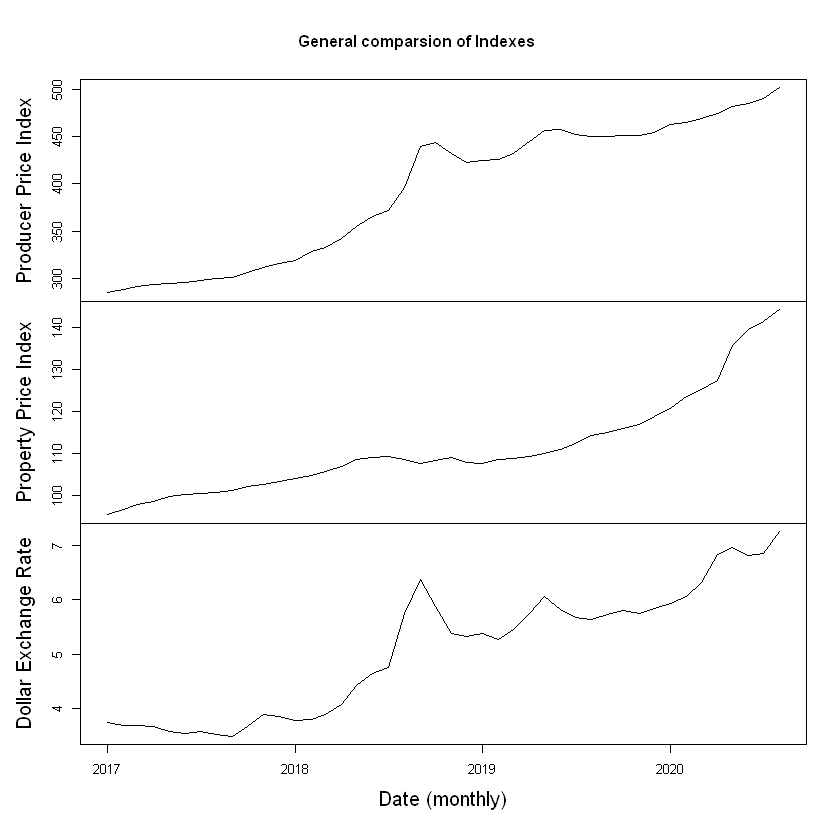

In [12]:
indexes<-c("Producer Price Index","Property Price Index", "Dollar Exchange Rate" )
plot(zoo(df_ts), main="General comparsion of Indexes ", xlab="Date (monthly)",ylab=indexes)

As mentioned above, observation of fluctuations hard to observe in different plots. So, all the indexes plotted at the same plot by using the zoo library. Datasets' actual values were kept in order to compare indexes by not just observing fluctuations, but also with values for datasets.

## c. Normalized Data Comparison

In [13]:
df_ts$producer_price_index_index_normalized=(df_ts$producer_price_index-min(df_ts$producer_price_index))/(max(df_ts$producer_price_index)-min(df_ts$producer_price_index))
df_ts$prop_price_index_normalized=(df_ts$prop_price_index-min(df_ts$prop_price_index))/(max(df_ts$prop_price_index)-min(df_ts$prop_price_index))
df_ts$dollar_rate_normalized=(df_ts$dollar_rate -min(df_ts$dollar_rate ))/(max(df_ts$dollar_rate )-min(df_ts$dollar_rate ))

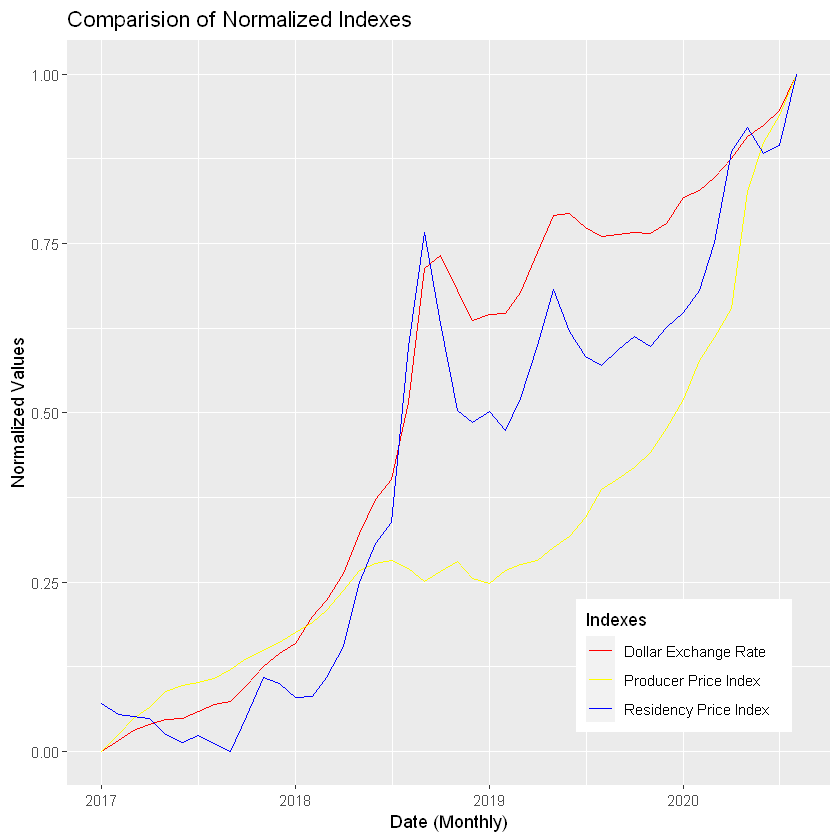

In [14]:
cols <- c("Dollar Exchange Rate" = "red", "Producer Price Index" = "yellow", "Residency Price Index" = "blue")

ggplot(df_ts)+geom_line(aes(x=Index, y=producer_price_index_index_normalized,color="Dollar Exchange Rate"))+
  geom_line(aes(x=Index, y=prop_price_index_normalized ,color="Producer Price Index"))+
  geom_line(aes(x=Index, y=dollar_rate_normalized , color= "Residency Price Index"))+
  ggtitle("Comparision of Normalized Indexes")+
  ylab("Normalized Values")+xlab("Date (Monthly)")+
  scale_color_manual(values = cols)+
  labs(colour = "Indexes")+ 
    theme(
    legend.position = c(.95, .25),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)
    )

Lastly, a line plot with normalized values for datasets is established. The underlying reason for using normalization values is to compare indexes without struggling with the difference in actual values of datasets. In other words, it is impossible to compare and observe the values of datasets with actual values because they don't have the same unit (type) of values. 

In general, by looking all the line plots, it can be said that there are similarities between the datasets and some similarities in terms of flactuations. This situation is a one of the good indicator for thinking there is a relevancy between the determined parameters. 


##  d. Density of Datasets

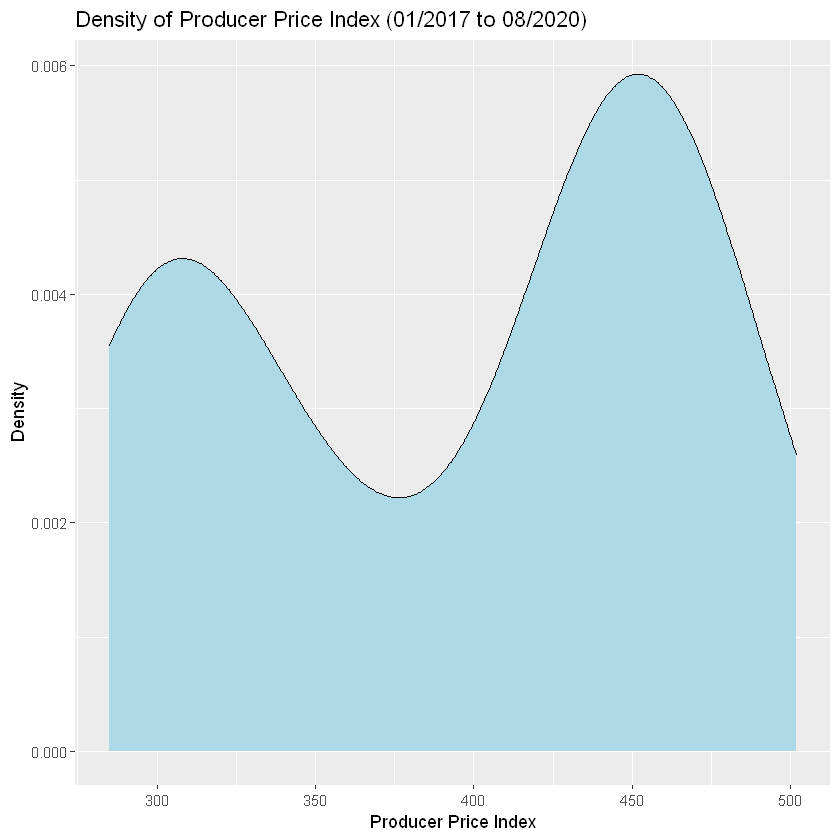

In [15]:
ggplot(df_ts, aes(producer_price_index))+ggtitle("Density of Producer Price Index (01/2017 to 08/2020)")+
  ylab("Density")+xlab("Producer Price Index")+geom_density(fill="lightblue")

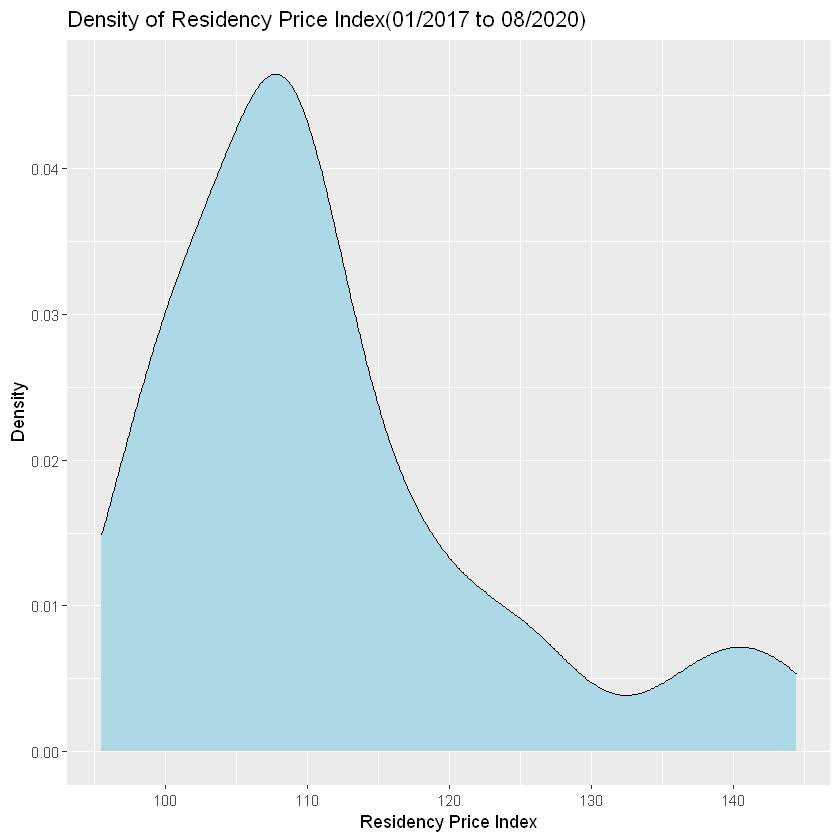

In [16]:
ggplot(df_ts, aes(prop_price_index))+ggtitle("Density of Residency Price Index(01/2017 to 08/2020)")+
  ylab("Density")+xlab("Residency Price Index")+geom_density(fill="lightblue")

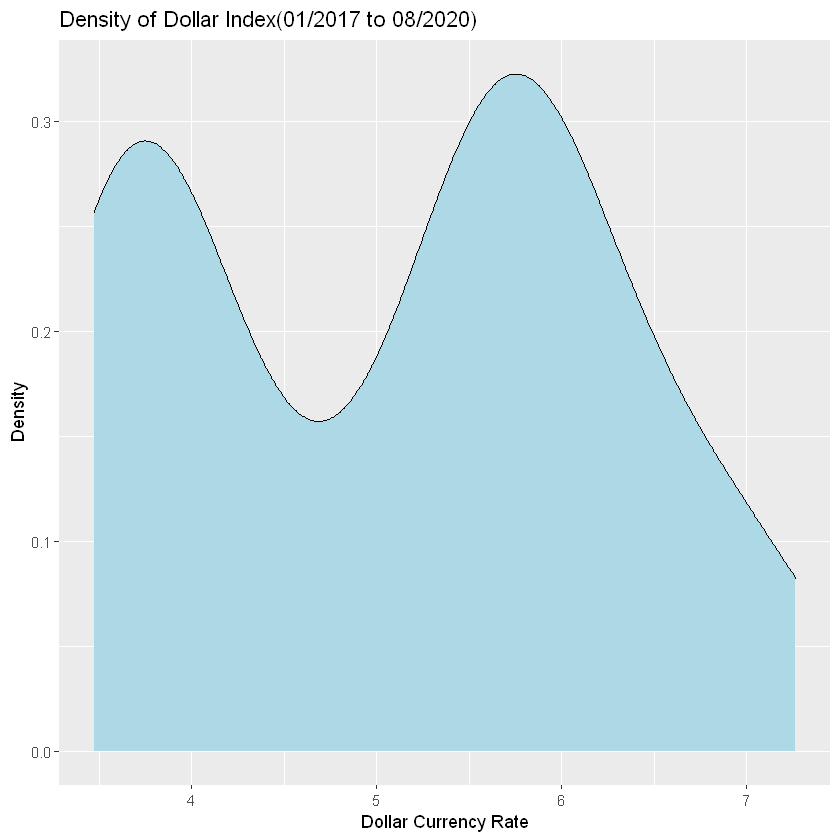

In [17]:
ggplot(df_ts, aes(dollar_rate))+ggtitle("Density of Dollar Index(01/2017 to 08/2020)")+
  ylab("Density")+xlab("Dollar Currency Rate")+geom_density(fill="lightblue")

One of the other possible visualization techniques for analyzing data is the density plot. However, the density plot cannot be enough indicator for concluding any decision. There is a similarity between Dollar Currency Rate and Producer Price Index in terms of shape of density plot. In addition, density values for each datasets are varied because of diffence in the range of datasets. 

## e. Density Comparison for Normalized values of Indexes

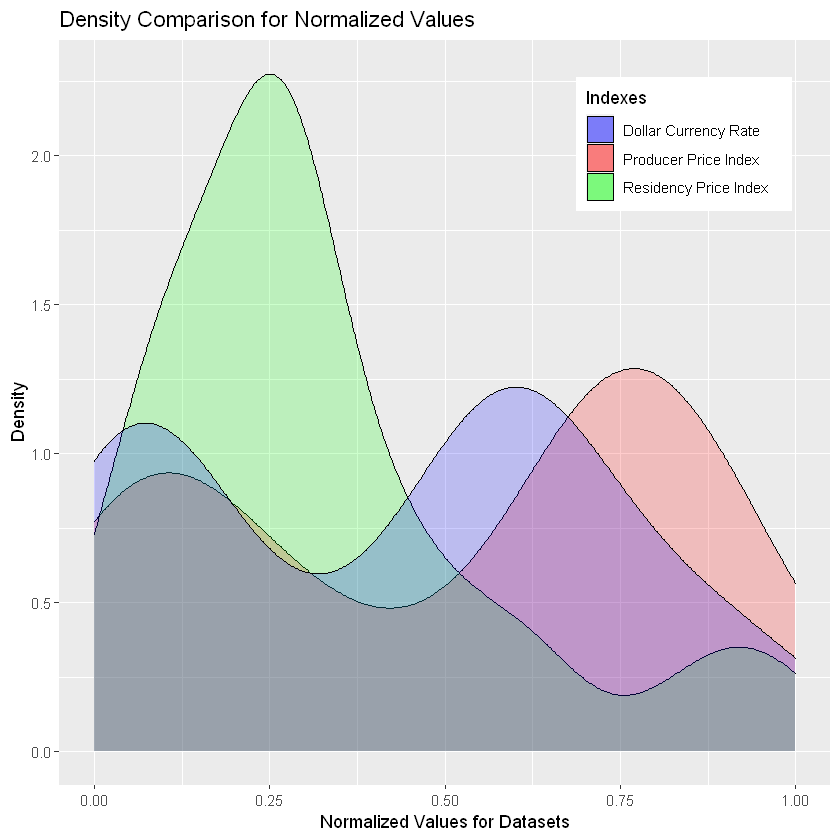

In [18]:
ggplot() +
  geom_density(aes(producer_price_index_index_normalized , fill = "Producer Price Index"), alpha = .2, data = df_ts) +
  geom_density(aes(prop_price_index_normalized  , fill = "Residency Price Index"), , alpha = .2, data = df_ts) +
  geom_density(aes(dollar_rate_normalized  , fill = "Dollar Currency Rate"), , alpha = .2, data = df_ts) +  
  scale_fill_manual(name = "Indexes", values = c("Producer Price Index" = "red", "Residency Price Index" = "green", "Dollar Currency Rate"="blue"))+
  labs(title = "Density Comparison for Normalized Values", x="Normalized Values for Datasets", y="Density")+ 
    theme(
    legend.position = c(.95, .95),
    legend.justification = c("right", "top"),
    legend.box.just = "right",
    legend.margin = margin(6, 6, 6, 6)
    )

In order to solve the difference in values of density for each dataset, normalized values can be used. By doing that, all the density plots can be drawn at the same plot and enable us to observe the shape of density plots more detailly. Again, the similarity between Dollar Currency Rate and Producer Price Index in terms of shape of density plot is achieved in this plot. 

# 5. Correlation between the Indexes

Correlation analysis is a good analysis for understanding relationships between the datasets. There are a lot of different correlation analysis types, but all of them have similar results in terms of demonstrating the relations. Correlation analysis is made by using corrplot library. First of all, the correlation between the datasets is observed visually.

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded


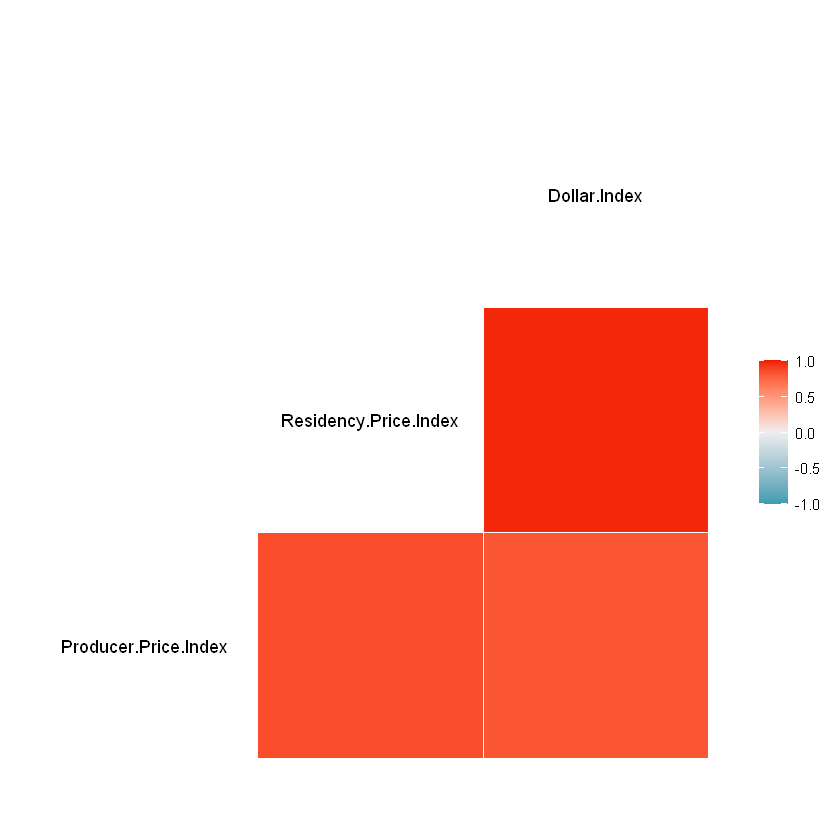

In [19]:
library(corrplot)
df_ts_req=df_ts[,c(2,3,4)]
colnames(df_ts_req)<- c("Producer Price Index", "Residency Price Index", "Dollar Index")
ggcorr(data.frame(df_ts_req), method = c("everything", "pearson")) 

Much as it can be said that there is a high correlation between the values, it is hard to find exact correlation values by just looking at the color scale. 

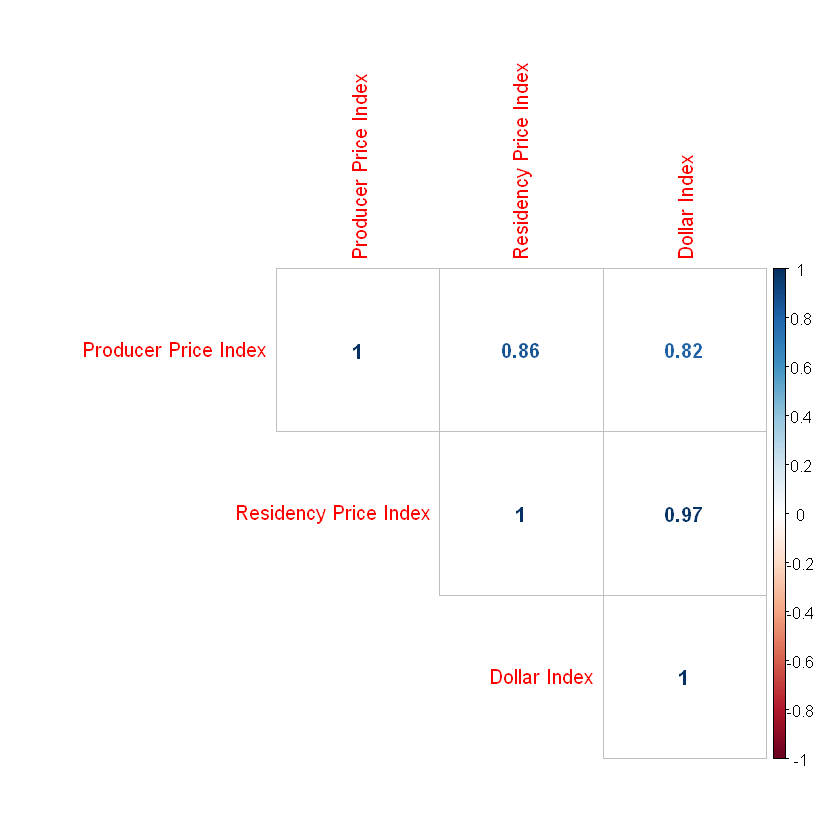

In [20]:
M<-cor(data.frame(df_ts_req))
colnames(M)<- c("Producer Price Index", "Residency Price Index", "Dollar Index")
rownames(M)<- c("Producer Price Index", "Residency Price Index", "Dollar Index")
corrplot(M,
  method = "number",
  type = "upper" ,# show only upper side
)

Exact correlation values are achieved in this analysis, and 0.86, 0.82, 0.97 can be counted as a high correlation in "pearson" correlation analysis. By knowing that 1 represents the highest correlation, all the obtained correlations are a good indicator of relevance between the values. 

In [21]:
cor(data.frame(df_ts_req), method = "pearson")

,Producer.Price.Index,Residency.Price.Index,Dollar.Index
Producer.Price.Index,1.0000000,0.8572972,0.8197629
Residency.Price.Index,0.8572972,1.0000000,0.9749450
Dollar.Index,0.8197629,0.9749450,1.0000000


A table result for correlation is also added to observe more precises (with decimal) correlation values for determined indexes. 

# 6. General Summary

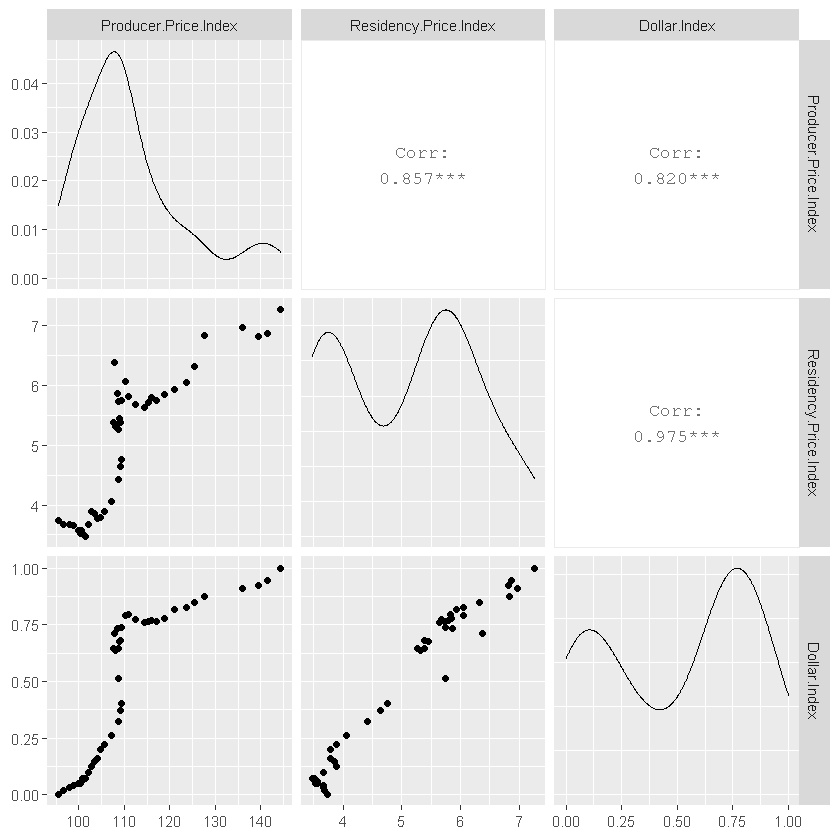

In [22]:
ggpairs(data.frame(df_ts_req))

ggpairs is one of the good options for overview and summarization of what obtained until now. Correlation, scatter plots, and density plots exist in the ggpairs. Again, the similarity between the datasets can be observed by looking at the shape of density plots and correlation values between the datasets. Namely, all determined values are relevant to each other. Fluctuations are also affected similarly can be said by looking at previous observations.

# 7. Conclusion 

Much as there are some researches related to determined questions none of them executed their analysis in Turkey. Namely, obtained conclusions may not be valid in different regions. In addition, all the researches made separately for determined datasets. In this analysis, all the determined analyzed simultaneously with datasets in Turkey. After all, determined questions are answered. What obtained and answered can be listed as follows:

* Resources mentioned in the intrıduction part is also valid for Turkey.
* There are relevancy between the researched parameters.
* Relevancy betweem the parameters are not only existing for increase trend but also for flactuations in values of indexes. 
* There are some similarities in the density plots of indexes. All the datasets have 2 different peaks in the value ranges.
* All the datasets highly correlated.

So, analysis enables to observe validify the relevance between the expected variables.

## 8. References

 All datasets obtained at <a href="https://evds2.tcmb.gov.tr/"> EVDS </a>